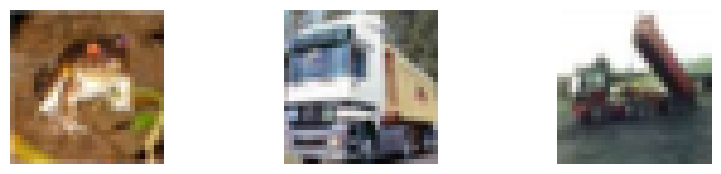

Training dataset size: 50000 samples, each with 3072 features
Testing dataset size: 10000 samples, each with 3072 features
Starting training for Random Forest with 1 trees
Training completed for Random Forest with 1 trees
Random Forest (1 trees):
  Training accuracy: 0.7178
  Testing accuracy: 0.2444
Starting training for Random Forest with 3 trees
Training completed for Random Forest with 3 trees
Random Forest (3 trees):
  Training accuracy: 0.8524
  Testing accuracy: 0.2656
Starting training for Random Forest with 5 trees
Training completed for Random Forest with 5 trees
Random Forest (5 trees):
  Training accuracy: 0.9463
  Testing accuracy: 0.3053
Starting training for Random Forest with 10 trees
Training completed for Random Forest with 10 trees
Random Forest (10 trees):
  Training accuracy: 0.9932
  Testing accuracy: 0.3566
Starting training for Random Forest with 50 trees
Training completed for Random Forest with 50 trees
Random Forest (50 trees):
  Training accuracy: 1.0000
  T

In [1]:
import os
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data_dir = '/workspace/178/projects/cifar-10-batches-py'

def load_batch(file_path):
    """Load batch of data from CIFAR-10 dataset."""
    with open(file_path, 'rb') as file:
        batch = pickle.load(file, encoding='latin1')
        images = batch['data']
        labels = batch['labels']
        return images, np.array(labels)

def convert_to_numpy(data_dir):
    """Converts CIFAR-10 dataset to numpy arrays."""
    train_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
    test_file = 'test_batch'

    train_images_list, train_labels_list = [], []
    for file_name in train_files:
        images, labels = load_batch(os.path.join(data_dir, file_name))
        train_images_list.append(images)
        train_labels_list.append(labels)

    train_images = np.concatenate(train_images_list, axis=0)
    train_labels = np.concatenate(train_labels_list, axis=0)
    test_images, test_labels = load_batch(os.path.join(data_dir, test_file))
    
    return train_images, train_labels, test_images, test_labels

train_data, train_labels, test_data, test_labels = convert_to_numpy('/workspace/178/projects/cifar-10-batches-py')

def show_images(images, num_images=3):
    images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) 
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')
    plt.show()


train_images, train_labels, test_images, test_labels = convert_to_numpy(data_dir)
show_images(train_images)  # Display the first few images from the train set


print(f"Training dataset size: {train_data.shape[0]} samples, each with {train_data.shape[1]} features")
print(f"Testing dataset size: {test_data.shape[0]} samples, each with {test_data.shape[1]} features")

n_estimators_values = [1, 3, 5, 10, 50]

for n_estimators in n_estimators_values:
    print(f"Starting training for Random Forest with {n_estimators} trees")
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators)

    rf_classifier.fit(train_data, train_labels)
    print(f"Training completed for Random Forest with {n_estimators} trees")

    train_pred_labels = rf_classifier.predict(train_data)
    train_accuracy = accuracy_score(train_labels, train_pred_labels)

    test_pred_labels = rf_classifier.predict(test_data)
    test_accuracy = accuracy_score(test_labels, test_pred_labels)

    print(f"Random Forest ({n_estimators} trees):")
    print(f"  Training accuracy: {train_accuracy:.4f}")
    print(f"  Testing accuracy: {test_accuracy:.4f}")
